In [1]:
%matplotlib inline

import gym
import numpy as np
import matplotlib.pyplot as plt

from math_utils import constant, exp_decay, harmonic_sequence, epsilon_greedy, softmax_policy, moving_avg
from tabular import train_with_plots, sarsa


# Sarsa

## Intro

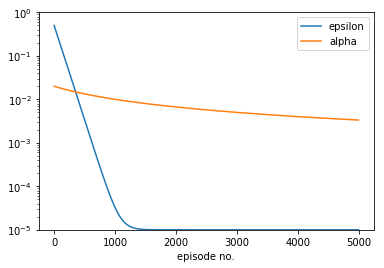

In [2]:
max_eps = int(5e3)
alpha = harmonic_sequence(2e-2, 1e-3, 1e-5)
epsilon = exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = epsilon_greedy(epsilon)

sarsa_episode_fn = sarsa(policy, gamma, alpha)


x = np.arange(max_eps)
plt.yscale('log')
plt.ylim([1e-5, 1])
plt.xlabel('episode no.')
plt.plot(x, np.vectorize(epsilon)(x), label='epsilon')
plt.plot(x, np.vectorize(alpha)(x), label='alpha')
plt.legend();

## Cliff Walking

In [3]:
def cliff_walking(episode_fn):
    env = gym.make('CliffWalking-v0')

    state_size = env.observation_space.n
    action_size = env.action_space.n

    print(f'action size = {action_size}')
    print(f'state size = {state_size}')

    # Optimistic initialisation
    Q_initial = 0.0 * np.ones((state_size, action_size), np.float64)
    
    returns, tracks = train_with_plots(env, episode_fn, max_eps, 100,
                                       [-250, 0], Q_initial)

action size = 4
state size = 48
 5000: -13.061

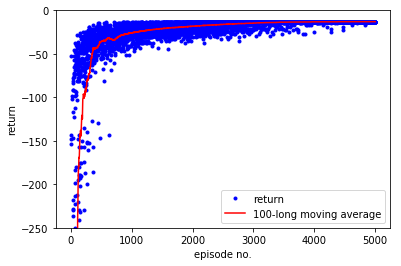

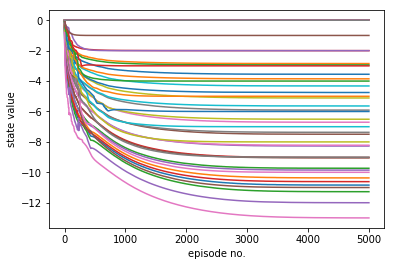

In [4]:
cliff_walking(sarsa_episode_fn)

## Frozen Lake

In [5]:
def frozen_lake(episode_fn):
    env = gym.make('FrozenLake-v0')

    state_size = env.observation_space.n
    action_size = env.action_space.n

    print(f'action size = {action_size}')
    print(f'state size = {state_size}')

    # Optimistic initialisation
    Q_initial = 1.0 * np.ones((state_size, action_size), np.float64)

    returns, tracks = train_with_plots(env, episode_fn, 1e4, 1000,
                                       [0, 1], Q_initial)

action size = 4
state size = 16
10000: 0.719

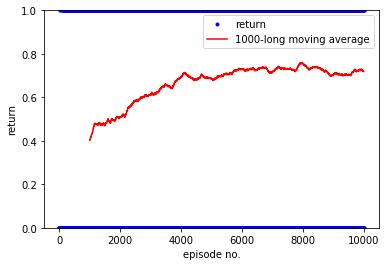

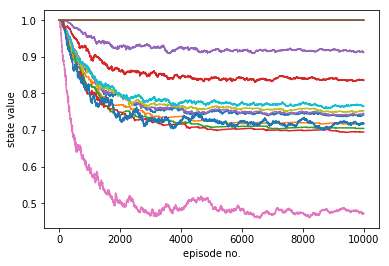

In [6]:
frozen_lake(sarsa_episode_fn)

## Softmax

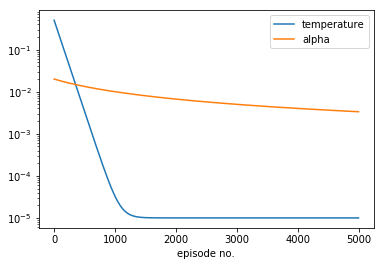

In [7]:
temp = exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = softmax_policy(temp)

sarsa_episode_fn_softmax = sarsa(policy, gamma, alpha)


x = np.arange(max_eps)
plt.yscale('log')
plt.xlabel('episode no.')
plt.plot(x, np.vectorize(temp)(x), label='temperature')
plt.plot(x, np.vectorize(alpha)(x), label='alpha')
plt.legend();

action size = 4
state size = 48
 5000: -13.087

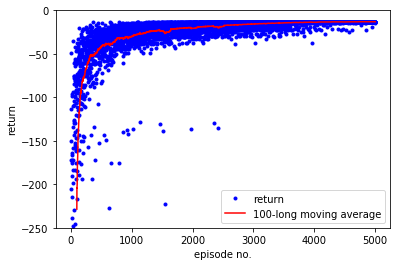

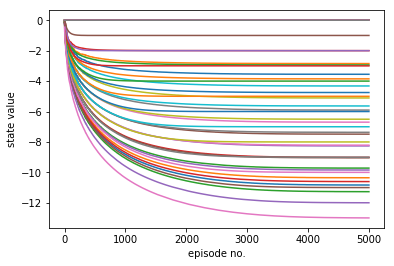

In [8]:
cliff_walking(sarsa_episode_fn_softmax)

action size = 4
state size = 16
10000: 0.765

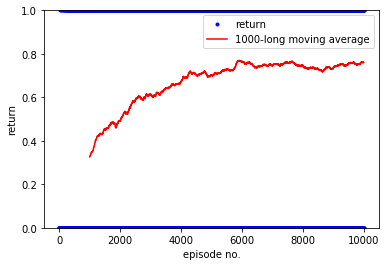

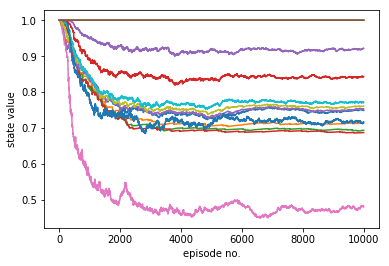

In [9]:
frozen_lake(sarsa_episode_fn_softmax)